In [1]:
import sys
sys.path.append('/Users/erikweilandt/Library/Caches/pypoetry/virtualenvs/tepem-FeojsIC2-py3.11/lib/python3.11/site-packages')

In [2]:
from sympy import symbols, simplify, prod, plot, diff
from sympy.plotting.plot import plot3d
import numpy as np

In [3]:
def LagrangPoly(y,order,i,yi=None):
    if yi==None:
        yi=symbols('y:%d'%(order+1))
    index = list(range(order+1))
    index.pop(i)
    return prod([(y-yi[j])/(yi[i]-yi[j]) for j in index])

reference: https://www.longqi.cf/python/2014/03/24/implement-of-lagrange-polynomial-in-sympy/

In [4]:
test_order = 2
test_nodes = np.linspace(0,1, test_order+1)

In [5]:
x, y=symbols('x y')
LagrangPoly(y,test_order,0)

(y - y1)*(y - y2)/((y0 - y1)*(y0 - y2))

## Define 1-D $\mathbb{P}_d$ shape functions in both directions

In [6]:
order_x = 1
order_y = 7

In [7]:
nodes_x = np.linspace(0,1, order_x+1)
nodes_y = np.linspace(0,1, order_y+1)

In [8]:
pols_x = {}
for i in range(order_x+1):
    pols_x[f"psi_{i}"] = simplify(LagrangPoly(x,order_x,i,list(nodes_x)))
pols_y = {}
for i in range(order_y+1):
    pols_y[f"xi_{i}"] = simplify(LagrangPoly(y,order_y,i,list(nodes_y)))
pols_x, pols_y

({'psi_0': 1.0 - 1.0*x, 'psi_1': 1.0*x},
 {'xi_0': -163.401388888889*y**7 + 653.605555555556*y**6 - 1073.78055555556*y**5 + 933.722222222222*y**4 - 460.668055555556*y**3 + 127.672222222222*y**2 - 18.15*y + 1.0,
  'xi_1': 8.16666666666667*y*(y - 1)*(1.4*y - 1.2)*(1.75*y - 1.25)*(2.33333333333333*y - 1.33333333333333)*(3.5*y - 1.5)*(7.0*y - 2.0),
  'xi_2': y*(-3431.42916666667*y**6 + 12745.3083333333*y**5 - 18907.875*y**4 + 14205.9166666667*y**3 - 5615.19583333333*y**2 + 1076.775*y - 73.5),
  'xi_3': 4.08333333333333*y*(y - 1)*(2.33333333333333*y - 2.0)*(3.5*y - 0.5)*(3.5*y - 2.5)*(7.0*y - 4.0)*(7.0*y - 2.0),
  'xi_4': y*(-5719.04861111111*y**6 + 19608.1666666667*y**5 - 26377.6527777778*y**4 + 17607.3333333333*y**3 - 6062.04861111111*y**2 + 1004.5*y - 61.25),
  'xi_5': 4.9*y*(y - 1)*(1.75*y - 0.25)*(2.33333333333333*y - 0.666666666666667)*(3.5*y - 1.5)*(7.0*y - 6.0)*(7.0*y - 4.0),
  'xi_6': y*(-1143.80972222222*y**6 + 3594.83055555555*y**5 - 4435.18055555555*y**4 + 2734.47222222222*y**3 

In [9]:
#for pol in pols_x.values():
#    plot(pol, (x,0,1))

# $\mathbb{Q}_{x,y}$ shape functions

Below we are numerating such that we follow the numbering as indicated in the notes. This means we first number all shape functions for x=0 and at last all shape functions with x=1.

In [10]:
q_sf = {}
name_counter = 0
for x_sf in pols_x.values():
    for y_sf in pols_y.values():
        q_sf[f"phi_{name_counter}"] = x_sf * y_sf
        name_counter += 1
q_sf

{'phi_0': (1.0 - 1.0*x)*(-163.401388888889*y**7 + 653.605555555556*y**6 - 1073.78055555556*y**5 + 933.722222222222*y**4 - 460.668055555556*y**3 + 127.672222222222*y**2 - 18.15*y + 1.0),
 'phi_1': 8.16666666666667*y*(1.0 - 1.0*x)*(y - 1)*(1.4*y - 1.2)*(1.75*y - 1.25)*(2.33333333333333*y - 1.33333333333333)*(3.5*y - 1.5)*(7.0*y - 2.0),
 'phi_2': y*(1.0 - 1.0*x)*(-3431.42916666667*y**6 + 12745.3083333333*y**5 - 18907.875*y**4 + 14205.9166666667*y**3 - 5615.19583333333*y**2 + 1076.775*y - 73.5),
 'phi_3': 4.08333333333333*y*(1.0 - 1.0*x)*(y - 1)*(2.33333333333333*y - 2.0)*(3.5*y - 0.5)*(3.5*y - 2.5)*(7.0*y - 4.0)*(7.0*y - 2.0),
 'phi_4': y*(1.0 - 1.0*x)*(-5719.04861111111*y**6 + 19608.1666666667*y**5 - 26377.6527777778*y**4 + 17607.3333333333*y**3 - 6062.04861111111*y**2 + 1004.5*y - 61.25),
 'phi_5': 4.9*y*(1.0 - 1.0*x)*(y - 1)*(1.75*y - 0.25)*(2.33333333333333*y - 0.666666666666667)*(3.5*y - 1.5)*(7.0*y - 6.0)*(7.0*y - 4.0),
 'phi_6': y*(1.0 - 1.0*x)*(-1143.80972222222*y**6 + 3594.830555

In [11]:
q_sf_velo = {}
name_counter = 0
for i, x_sf in enumerate(pols_x.values()):
    for j, y_sf in enumerate(pols_y.values()):
        if j%order_y != 0:
            q_sf_velo[f"phi_{name_counter}"] = x_sf * y_sf
            name_counter += 1
q_sf_velo

{'phi_0': 8.16666666666667*y*(1.0 - 1.0*x)*(y - 1)*(1.4*y - 1.2)*(1.75*y - 1.25)*(2.33333333333333*y - 1.33333333333333)*(3.5*y - 1.5)*(7.0*y - 2.0),
 'phi_1': y*(1.0 - 1.0*x)*(-3431.42916666667*y**6 + 12745.3083333333*y**5 - 18907.875*y**4 + 14205.9166666667*y**3 - 5615.19583333333*y**2 + 1076.775*y - 73.5),
 'phi_2': 4.08333333333333*y*(1.0 - 1.0*x)*(y - 1)*(2.33333333333333*y - 2.0)*(3.5*y - 0.5)*(3.5*y - 2.5)*(7.0*y - 4.0)*(7.0*y - 2.0),
 'phi_3': y*(1.0 - 1.0*x)*(-5719.04861111111*y**6 + 19608.1666666667*y**5 - 26377.6527777778*y**4 + 17607.3333333333*y**3 - 6062.04861111111*y**2 + 1004.5*y - 61.25),
 'phi_4': 4.9*y*(1.0 - 1.0*x)*(y - 1)*(1.75*y - 0.25)*(2.33333333333333*y - 0.666666666666667)*(3.5*y - 1.5)*(7.0*y - 6.0)*(7.0*y - 4.0),
 'phi_5': y*(1.0 - 1.0*x)*(-1143.80972222222*y**6 + 3594.83055555555*y**5 - 4435.18055555555*y**4 + 2734.47222222222*y**3 - 880.843055555555*y**2 + 138.697222222222*y - 8.16666666666666),
 'phi_6': 8.16666666666667*x*y*(y - 1)*(1.4*y - 1.2)*(1.75*y 

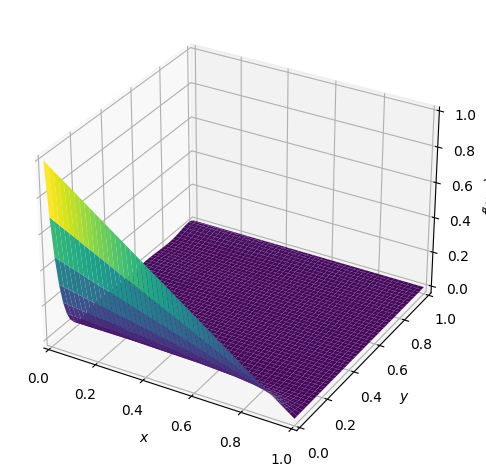

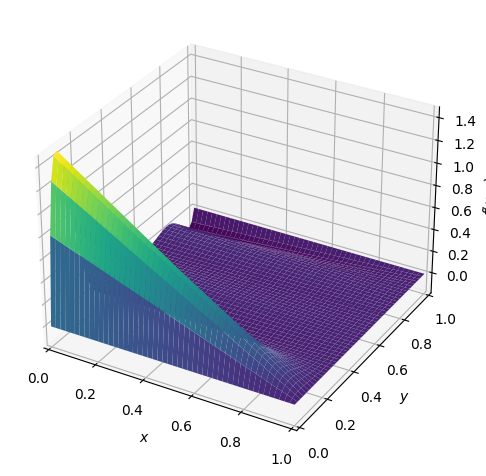

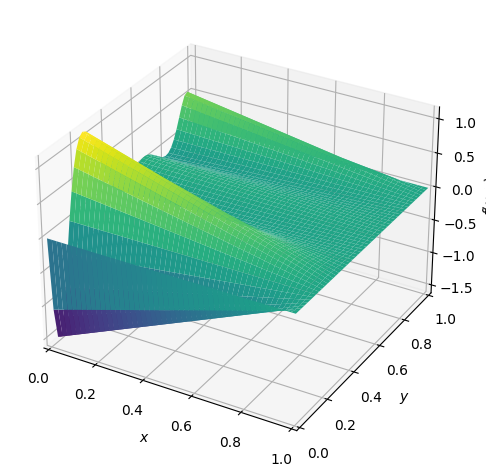

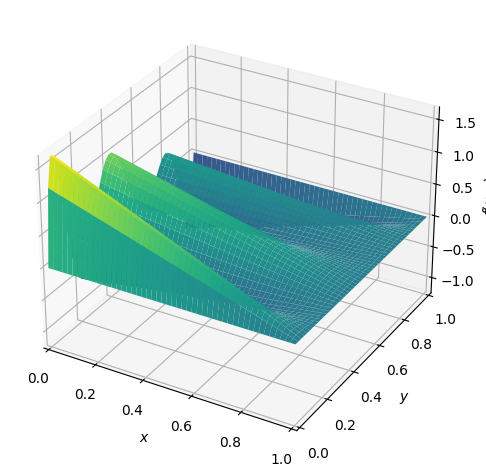

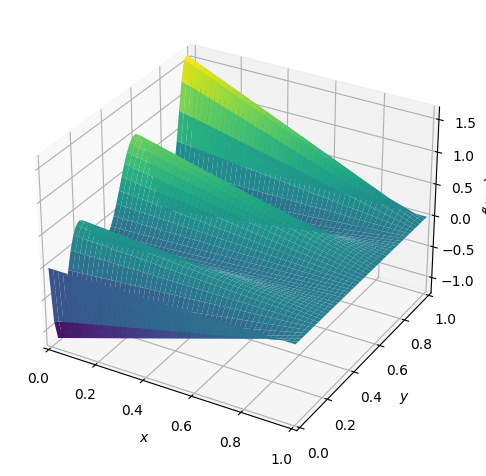

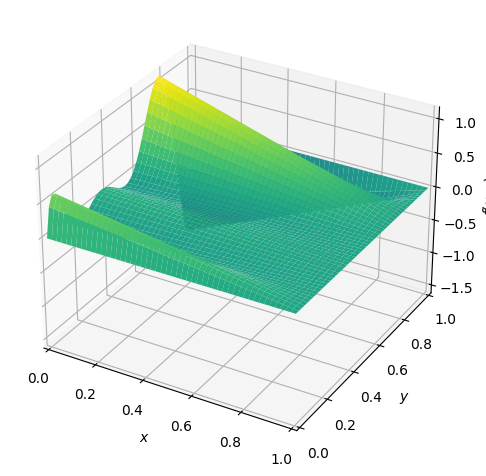

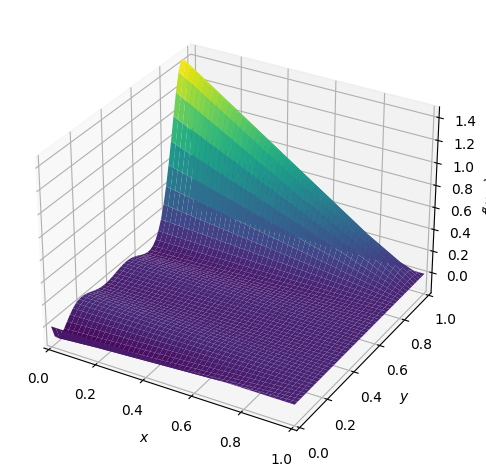

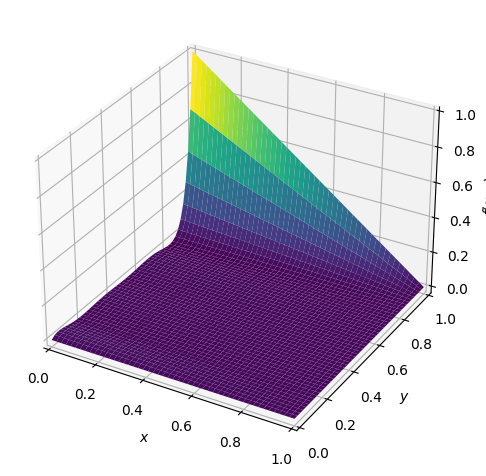

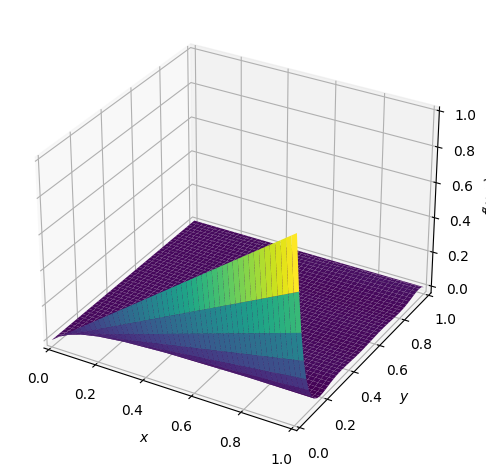

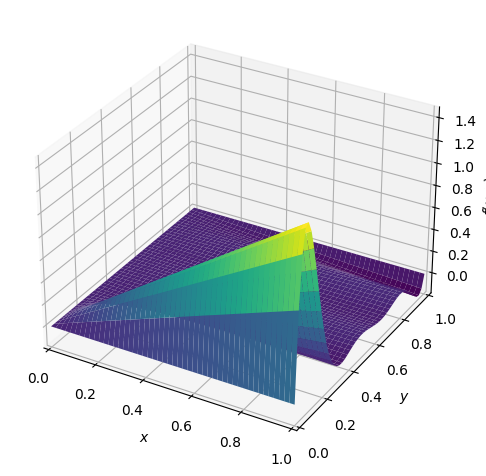

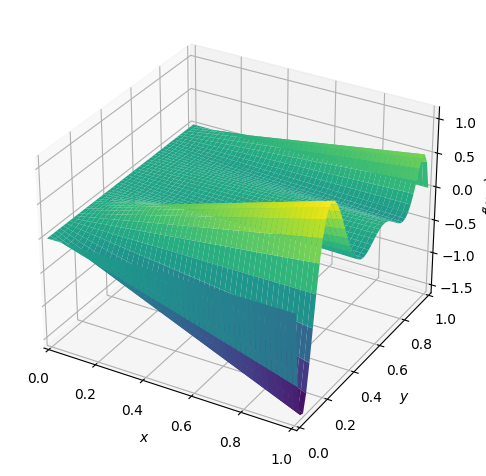

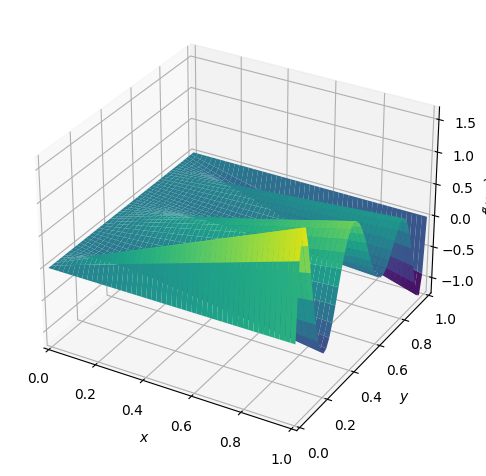

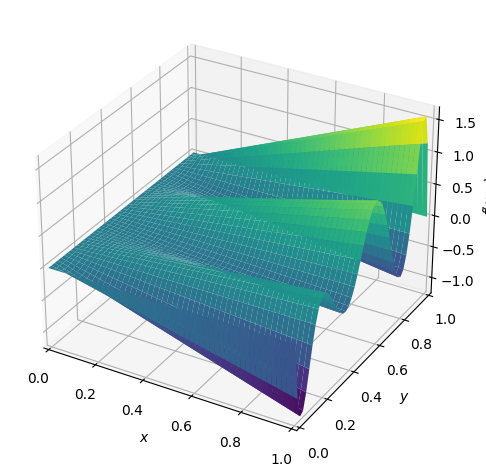

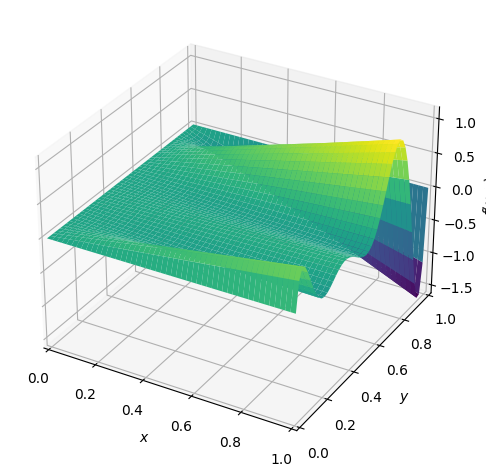

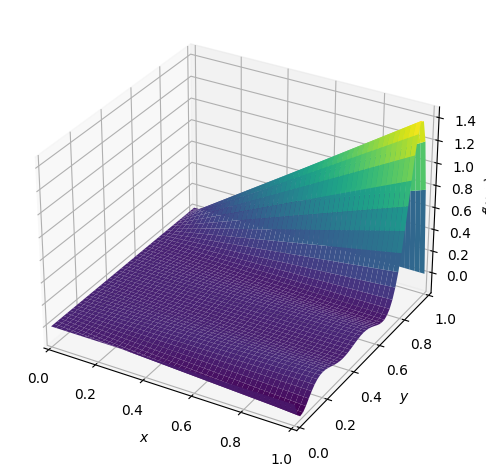

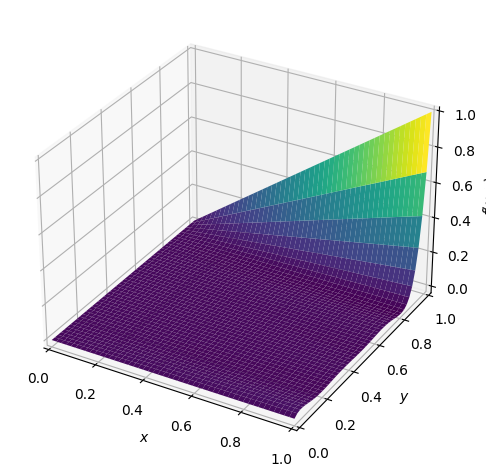

In [12]:
for pol in q_sf.values():
    plot3d(pol,(x,0,1), (y,0,1))

### Testing numeration

In [13]:
# check if the correct nodes are == 1
for i in range(order_y-1):
    assert q_sf_velo[f"phi_{i}"].subs([(x,0), (y,nodes_y[i+1])]) < 1+10e-10 and q_sf_velo[f"phi_{i}"].subs([(x,0), (y,nodes_y[i+1])]) > 1-10e-10, f"Node {i} is wrong"

In [14]:
grad_q = {}
for i, sf in enumerate(q_sf.values()):
    grad_x = diff(sf, x)
    grad_y = diff(sf, y)
    grad_q[f"grad_phi_{i}"] = (grad_x, grad_y)
#grad_q

In [15]:
grad_q_velo = {}
for i, sf in enumerate(q_sf_velo.values()):
    grad_x = diff(sf, x)
    grad_y = diff(sf, y)
    grad_q_velo[f"grad_phi_{i}"] = (grad_x, grad_y)
#grad_q_velo

## Printing in function form for script input

In [20]:
# Printing all shape functions
for sf_name, sf in q_sf.items():
    def_header = f"def {sf_name}(x: float, y: float) -> float:\n"
    body = f"\treturn {sf}"
    #print(def_header + body)

In [21]:
# Printing only velocity shape functions: leaving out the boundary shape functions
for sf_name, sf in q_sf_velo.items():
    def_header = f"def {sf_name}(x: float, y: float) -> float:\n"
    body = f"\treturn {sf}"
    print(def_header + body)

def phi_0(x: float, y: float) -> float:
	return 8.16666666666667*y*(1.0 - 1.0*x)*(y - 1)*(1.4*y - 1.2)*(1.75*y - 1.25)*(2.33333333333333*y - 1.33333333333333)*(3.5*y - 1.5)*(7.0*y - 2.0)
def phi_1(x: float, y: float) -> float:
	return y*(1.0 - 1.0*x)*(-3431.42916666667*y**6 + 12745.3083333333*y**5 - 18907.875*y**4 + 14205.9166666667*y**3 - 5615.19583333333*y**2 + 1076.775*y - 73.5)
def phi_2(x: float, y: float) -> float:
	return 4.08333333333333*y*(1.0 - 1.0*x)*(y - 1)*(2.33333333333333*y - 2.0)*(3.5*y - 0.5)*(3.5*y - 2.5)*(7.0*y - 4.0)*(7.0*y - 2.0)
def phi_3(x: float, y: float) -> float:
	return y*(1.0 - 1.0*x)*(-5719.04861111111*y**6 + 19608.1666666667*y**5 - 26377.6527777778*y**4 + 17607.3333333333*y**3 - 6062.04861111111*y**2 + 1004.5*y - 61.25)
def phi_4(x: float, y: float) -> float:
	return 4.9*y*(1.0 - 1.0*x)*(y - 1)*(1.75*y - 0.25)*(2.33333333333333*y - 0.666666666666667)*(3.5*y - 1.5)*(7.0*y - 6.0)*(7.0*y - 4.0)
def phi_5(x: float, y: float) -> float:
	return y*(1.0 - 1.0*x)*

In [22]:
# Printing all gradient shape functions
for sf_name, sf in grad_q.items():
    def_header = f"def {sf_name}(x: float, y: float) -> npt.NDArray[np.float64]:\n"
    body = f"\tphi_dx = {sf[0]}\n\tphi_dy = {sf[1]}\n"
    return_str = f"\treturn np.array([phi_dx, phi_dy])"
    #print(def_header + body + return_str)

In [23]:
# Print velocity dof: leaving out the gradiants of shape function on the boundary
for sf_name, sf in grad_q_velo.items():
    def_header = f"def {sf_name}(x: float, y: float) -> npt.NDArray[np.float64]:\n"
    body = f"\tphi_dx = {sf[0]}\n\tphi_dy = {sf[1]}\n"
    return_str = f"\treturn np.array([phi_dx, phi_dy])"
    print(def_header + body + return_str)

def grad_phi_0(x: float, y: float) -> npt.NDArray[np.float64]:
	phi_dx = -8.16666666666667*y*(y - 1)*(1.4*y - 1.2)*(1.75*y - 1.25)*(2.33333333333333*y - 1.33333333333333)*(3.5*y - 1.5)*(7.0*y - 2.0)
	phi_dy = 57.1666666666667*y*(1.0 - 1.0*x)*(y - 1)*(1.4*y - 1.2)*(1.75*y - 1.25)*(2.33333333333333*y - 1.33333333333333)*(3.5*y - 1.5) + 28.5833333333333*y*(1.0 - 1.0*x)*(y - 1)*(1.4*y - 1.2)*(1.75*y - 1.25)*(2.33333333333333*y - 1.33333333333333)*(7.0*y - 2.0) + 19.0555555555556*y*(1.0 - 1.0*x)*(y - 1)*(1.4*y - 1.2)*(1.75*y - 1.25)*(3.5*y - 1.5)*(7.0*y - 2.0) + 14.2916666666667*y*(1.0 - 1.0*x)*(y - 1)*(1.4*y - 1.2)*(2.33333333333333*y - 1.33333333333333)*(3.5*y - 1.5)*(7.0*y - 2.0) + 11.4333333333333*y*(1.0 - 1.0*x)*(y - 1)*(1.75*y - 1.25)*(2.33333333333333*y - 1.33333333333333)*(3.5*y - 1.5)*(7.0*y - 2.0) + 8.16666666666667*y*(1.0 - 1.0*x)*(1.4*y - 1.2)*(1.75*y - 1.25)*(2.33333333333333*y - 1.33333333333333)*(3.5*y - 1.5)*(7.0*y - 2.0) + 8.16666666666667*(1.0 - 1.0*x)*(y - 1)*(1.4*y - 1.2